##Feature Selection & Model Comparison

In [1]:
!pip install scikit-learn matplotlib pandas

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [4]:
X = df.drop("target", axis=1)
y = df["target"]

In [5]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(score_func=chi2, k=10).fit_transform(X,y)

In [6]:
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sel, X_test_sel, _, _ = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [9]:
results = []

In [10]:
for name,model in models.items():
    model.fit(X_train_full, y_train)
    y_pred_full = model.predict(X_test_full)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
model.fit(X_train_sel, y_train)
y_pred_sel = model.predict(X_test_sel)

In [14]:
results.append({
        "Model": name,
        "Accuracy (All)": accuracy_score(y_test, y_pred_full),
        "Accuracy (Top 10)": accuracy_score(y_test, y_pred_sel),
        "F1 (All)": f1_score(y_test, y_pred_full),
        "F1 (Top 10)": f1_score(y_test, y_pred_sel)
    })

In [15]:
results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy (All)  Accuracy (Top 10)  F1 (All)  F1 (Top 10)
0  Random Forest        0.964912           0.947368  0.972222     0.958904
1  Random Forest        0.964912           0.947368  0.972222     0.958904


In [16]:
import matplotlib.pyplot as plt

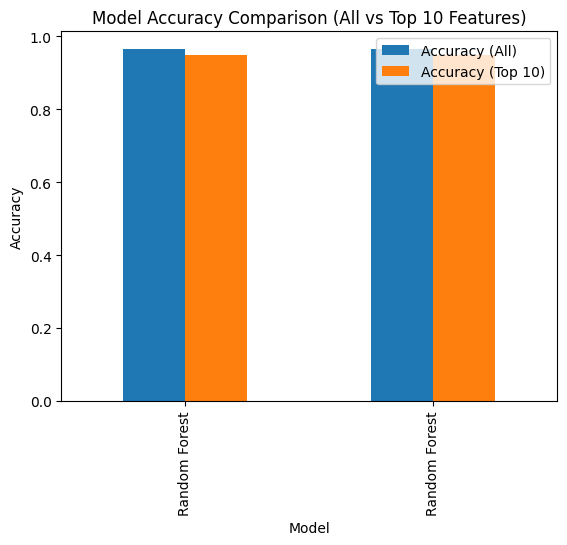

In [17]:
results_df.set_index("Model")[["Accuracy (All)", "Accuracy (Top 10)"]].plot(kind="bar")
plt.title("Model Accuracy Comparison (All vs Top 10 Features)")
plt.ylabel("Accuracy")
plt.show()

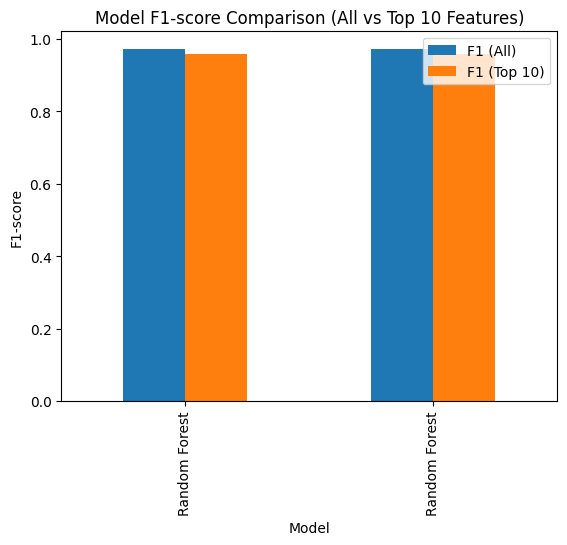

In [18]:
results_df.set_index("Model")[["F1 (All)", "F1 (Top 10)"]].plot(kind="bar")
plt.title("Model F1-score Comparison (All vs Top 10 Features)")
plt.ylabel("F1-score")
plt.show()

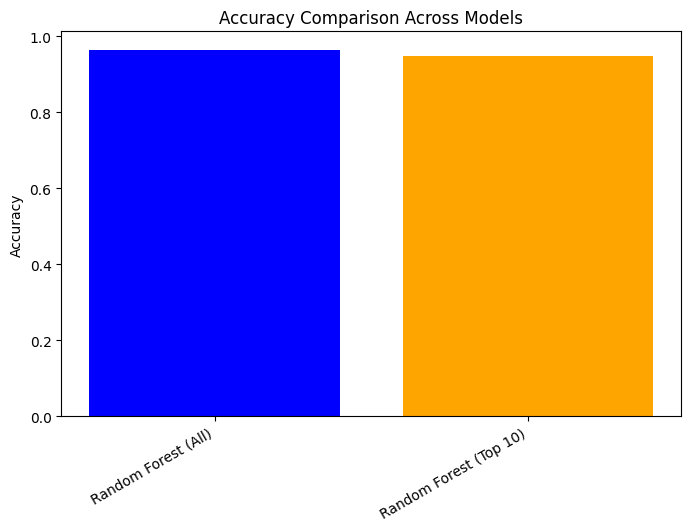

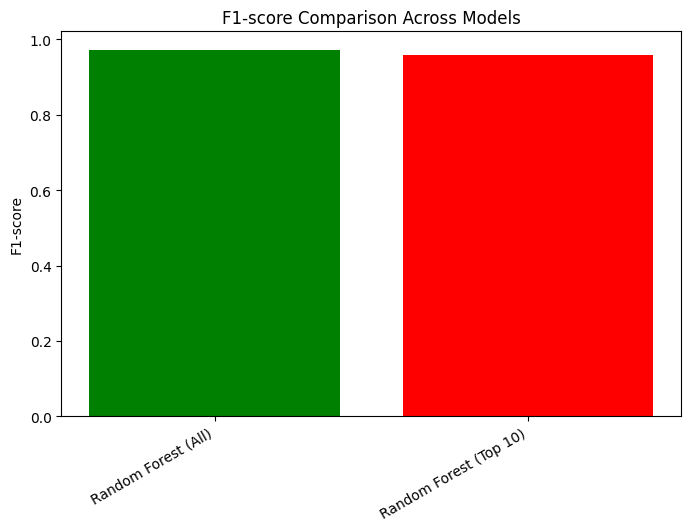

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for i, row in results_df.iterrows():
    plt.bar(row["Model"] + " (All)", row["Accuracy (All)"], color="blue")
    plt.bar(row["Model"] + " (Top 10)", row["Accuracy (Top 10)"], color="orange")
plt.title("Accuracy Comparison Across Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha="right")
plt.show()

plt.figure(figsize=(8,5))
for i, row in results_df.iterrows():
    plt.bar(row["Model"] + " (All)", row["F1 (All)"], color="green")
    plt.bar(row["Model"] + " (Top 10)", row["F1 (Top 10)"], color="red")
plt.title("F1-score Comparison Across Models")
plt.ylabel("F1-score")
plt.xticks(rotation=30, ha="right")
plt.show()